# UCI Metro dataset

In [35]:
import pandas as pd
import os
from pathlib import Path
from config import data_raw_folder, data_processed_folder
from timeeval import Datasets
import matplotlib.pyplot as plt

In [36]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [37]:
dataset_collection_name = "Metro"
source_folder = Path(data_raw_folder) / "UCI ML Repository/Metro"
target_folder = Path(data_processed_folder)

from pathlib import Path
print(f"Looking for source datasets in {source_folder.absolute()} and\nsaving processed datasets in {target_folder.absolute()}")

Looking for source datasets in /home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository/Metro and
saving processed datasets in /home/projects/akita/data/benchmark-data/data-processed


## Dataset transformation and pre-processing

In [41]:
train_type = "unsupervised"
train_is_normal = False
input_type = "multivariate"
datetime_index = True
dataset_type = "real"

# create target directory
dataset_subfolder = os.path.join(input_type, dataset_collection_name)
target_subfolder = os.path.join(target_folder, dataset_subfolder)
try:
    os.makedirs(target_subfolder)
    print(f"Created directories {target_subfolder}")
except FileExistsError:
    print(f"Directories {target_subfolder} already exist")
    pass

dm = Datasets(target_folder)

Directories /home/projects/akita/data/benchmark-data/data-processed/multivariate/Metro already exist


In [42]:
# get target filenames
dataset_name = "metro-traffic-volume"
filename = f"{dataset_name}.test.csv"

source_file = source_folder / "Metro_Interstate_Traffic_Volume.csv"
path = os.path.join(dataset_subfolder, filename)
target_filepath = os.path.join(target_subfolder, filename)

# transform file
df = pd.read_csv(source_file)
df = df[["date_time", "traffic_volume", "temp", "rain_1h", "snow_1h", "clouds_all", "holiday"]].copy()
df.insert(0, "timestamp", pd.to_datetime(df["date_time"]))
df.loc[df["holiday"] == "None", "is_anomaly"] = 0
df.loc[~(df["holiday"] == "None"), "is_anomaly"] = 1
df["is_anomaly"] = df["is_anomaly"].astype(int)
df = df.drop(columns=["date_time", "holiday"])
df.to_csv(target_filepath, index=False)
print(f"Processed source dataset {source_file} -> {target_filepath}")

dataset_length = len(df)

# save metadata
dm.add_dataset((dataset_collection_name, dataset_name),
    train_path = None,
    test_path = path,
    dataset_type = dataset_type,
    datetime_index = datetime_index,
    split_at = None,
    train_type = train_type,
    train_is_normal = train_is_normal,
    input_type = input_type,
    dataset_length = dataset_length
)

dm.save()

Processed source dataset /home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository/Metro/Metro_Interstate_Traffic_Volume.csv -> /home/projects/akita/data/benchmark-data/data-processed/multivariate/Metro/metro-traffic-volume.test.csv


In [43]:
dm.refresh()
dm._df.loc[slice(dataset_collection_name, dataset_collection_name)]

,,train_path,test_path,dataset_type,datetime_index,split_at,train_type,train_is_normal,input_type,length
collection_name,dataset_name,,,,,,,,,
Metro,metro-traffic-volume,NaN,multivariate/Metro/metro-traffic-volume.test.csv,real,True,NaN,unsupervised,False,multivariate,48204


## Experimentation

In [9]:
source_file = source_folder / "Metro_Interstate_Traffic_Volume.csv"
df = pd.read_csv(source_file)
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [33]:
df1 = df[["date_time", "traffic_volume", "temp", "rain_1h", "snow_1h", "clouds_all", "holiday"]].copy()
df1.insert(0, "timestamp", pd.to_datetime(df1["date_time"]))
df1.loc[df1["holiday"] == "None", "is_anomaly"] = 0
df1.loc[~(df1["holiday"] == "None"), "is_anomaly"] = 1
df1["is_anomaly"] = df1["is_anomaly"].astype(int)
df1 = df1.drop(columns=["date_time", "holiday"])
df1

,timestamp,traffic_volume,temp,rain_1h,snow_1h,clouds_all,is_anomaly
0,2012-10-02 09:00:00,5545,288.28,0.0,0.0,40,0
1,2012-10-02 10:00:00,4516,289.36,0.0,0.0,75,0
2,2012-10-02 11:00:00,4767,289.58,0.0,0.0,90,0
3,2012-10-02 12:00:00,5026,290.13,0.0,0.0,90,0
4,2012-10-02 13:00:00,4918,291.14,0.0,0.0,75,0
...,...,...,...,...,...,...,...
48199,2018-09-30 19:00:00,3543,283.45,0.0,0.0,75,0
48200,2018-09-30 20:00:00,2781,282.76,0.0,0.0,90,0
48201,2018-09-30 21:00:00,2159,282.73,0.0,0.0,90,0
48202,2018-09-30 22:00:00,1450,282.09,0.0,0.0,90,0


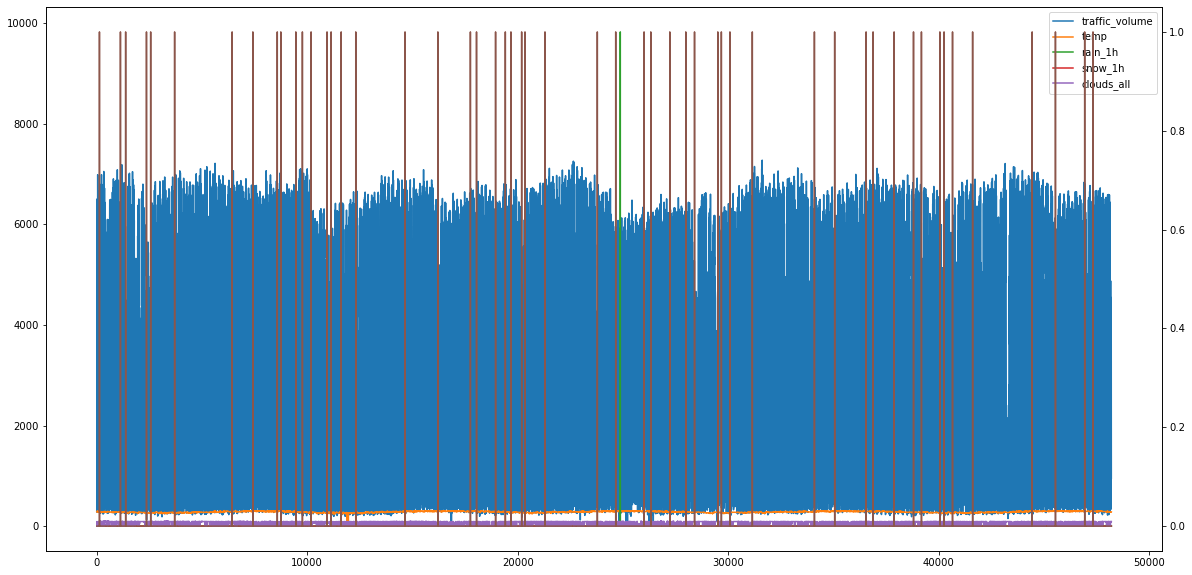

In [34]:
df1[["traffic_volume", "temp", "rain_1h", "snow_1h", "clouds_all"]].plot()
df1["is_anomaly"].plot(secondary_y=True)
plt.show()